In [132]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, cohen_kappa_score
from sklearn.model_selection import cross_val_score

In [133]:
# Dataset from https://www.kaggle.com/jessemostipak/hotel-booking-demand

df = pd.read_csv('./Data/hotel_bookings.csv')

In [134]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [136]:
# Converting string values into ints

In [137]:
# Converting hotel types from str to int

df.hotel = df.hotel.replace(['City Hotel', 'Resort Hotel'], [0, 1])

In [138]:
# Converting country from str to int

# First remove nan from list

land = df.country.unique()
check = [not pd.isnull(country) for country in land]
land = land[check]
land = np.sort(land)

land

array(['ABW', 'AGO', 'AIA', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'ASM',
       'ATA', 'ATF', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA',
       'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BOL', 'BRA', 'BRB',
       'BWA', 'CAF', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'CN', 'COL',
       'COM', 'CPV', 'CRI', 'CUB', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI',
       'DMA', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ESP', 'EST', 'ETH',
       'FIN', 'FJI', 'FRA', 'FRO', 'GAB', 'GBR', 'GEO', 'GGY', 'GHA',
       'GIB', 'GLP', 'GNB', 'GRC', 'GTM', 'GUY', 'HKG', 'HND', 'HRV',
       'HUN', 'IDN', 'IMN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR',
       'ITA', 'JAM', 'JEY', 'JOR', 'JPN', 'KAZ', 'KEN', 'KHM', 'KIR',
       'KNA', 'KOR', 'KWT', 'LAO', 'LBN', 'LBY', 'LCA', 'LIE', 'LKA',
       'LTU', 'LUX', 'LVA', 'MAC', 'MAR', 'MCO', 'MDG', 'MDV', 'MEX',
       'MKD', 'MLI', 'MLT', 'MMR', 'MNE', 'MOZ', 'MRT', 'MUS', 'MWI',
       'MYS', 'MYT', 'NAM', 'NCL', 'NGA', 'NIC', 'NLD', 'NOR', 'NPL',
       'NZL', 'OMN', 

In [139]:
# Now create a dictionary named "lan" to replace the country names with numbers

lan = {}
i = 0
for l in land:
    i += 1
    lan[l] = i

# Replacing:

df.country = df.country.map(lan)

# Second convert nan to 0 in country

df.country = df.country.fillna(0)

df.country = df.country.astype(int) # Converting from float to int

df.country.unique()

array([136.,  60., 170.,  52.,  77.,  57.,  nan, 140., 125., 128.,   7.,
       134.,  44.,  16.,  30.,  35.,  67.,  82., 124.,  47., 141., 155.,
        12.,  53.,  43.,  26.,  55., 114.,  28., 101., 154.,   4.,  76.,
        32., 108., 104., 167., 149., 102., 135., 150.,  31.,  13.,  24.,
       100., 163., 175.,   2.,  81.,  41., 176.,  38., 177.,  49.,  92.,
        39.,  73.,   6., 162.,  83.,  72.,  70.,  78.,  61.,   5.,  64.,
       169.,  84.,  29.,  42.,  36.,  62.,  93., 122., 107., 172., 153.,
        56.,  87., 129.,  74.,  95., 132., 145., 156.,  14.,  21., 127.,
       159.,  48., 109., 118.,   8.,  86.,  99.,  40.,  34.,  23., 116.,
        37., 152., 166.,  20.,  33.,  85., 157., 146.,  15., 143., 174.,
       133., 139.,  51., 131., 111., 117.,  50., 106.,  80., 171., 126.,
        22., 103., 158., 164.,  45., 151.,  91.,  54.,  79.,  71., 142.,
        89., 105.,  19.,  75., 160., 123.,  17., 173., 165.,  59.,  63.,
       161.,  65.,  88.,  98.,  66., 113., 168., 11

In [141]:
df.market_segment.unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [142]:
# Converting market_segment from str to int

market_seg = df.market_segment.unique()

ms = {}
i = 0
for m in market_seg:
    i += 1
    ms[m] = i

# Replacement:

df.market_segment = df.market_segment.map(ms)

df.market_segment.unique()

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [143]:
df.distribution_channel.unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [144]:
# Converting distribution_channel from str to int

df.distribution_channel = df.distribution_channel.map({'Undefined':0, 'Direct':1, 'Corporate':2, 'TA/TO':3, 'GDS':4})

df.distribution_channel.unique()

array([1, 2, 3, 0, 4], dtype=int64)

In [145]:
df.deposit_type.unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [146]:
# Converting deposit_type from str to int

df.deposit_type = df.deposit_type.map({'No Deposit':0, 'Refundable':1, 'Non Refund':2})

df.deposit_type.unique()

array([0, 1, 2], dtype=int64)

In [147]:
# Creating a compact df version with only relevant columns for prediction of cancellation

selected_cols = ('market_segment', 'distribution_channel', 'deposit_type', 'hotel')
filter_cols = [col for col in df if col.startswith(selected_cols)]
df_compact = df[['is_canceled', 'lead_time', 'previous_cancellations', 'required_car_parking_spaces', 'total_of_special_requests', 'country']]
df2 = df[filter_cols]
df_compact = pd.concat([df_compact, df2], axis = 1)

df = df_compact

df.columns

Index(['is_canceled', 'lead_time', 'previous_cancellations',
       'required_car_parking_spaces', 'total_of_special_requests', 'country',
       'hotel', 'market_segment', 'distribution_channel', 'deposit_type'],
      dtype='object')

In [148]:
# CANCELLATION PREDICTION - ALL DATA BUT WITHOUT RESERVATION_STATUS

In [149]:
X = df.drop(['is_canceled'], axis = 1)
y = df['is_canceled']
y = np.array(y)

In [150]:
# Scaling

X_scaled = StandardScaler().fit_transform(X)

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 3)

In [152]:
# Logistic Regression
model_lr = LogisticRegression().fit(X_train, y_train)
model_lr_prediction = model_lr.predict(X_test)
version_lr = accuracy_score(y_test, model_lr_prediction)
version_lr

0.7747717564285116

In [153]:
kappa_lr = cohen_kappa_score(y_test, model_lr_prediction)
kappa_lr

0.47179975519712924

Feature: 0, Score: 0.43896
Feature: 1, Score: 0.90438
Feature: 2, Score: -2.90187
Feature: 3, Score: -0.41906
Feature: 4, Score: 0.40778
Feature: 5, Score: -0.05328
Feature: 6, Score: -0.63830
Feature: 7, Score: 0.66447
Feature: 8, Score: 1.79088


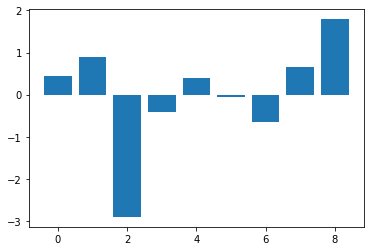

In [154]:
#Feature Importance

# Get importance
importance = model_lr.coef_[0]

# Summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
 
# Plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [155]:
# Decision Tree
model_dt = tree.DecisionTreeClassifier().fit(X_train, y_train)
model_dt_prediction = model_dt.predict(X_test)
version_dt = accuracy_score(y_test, model_dt_prediction)
version_dt

0.8294245749225229

In [156]:
kappa_dt = cohen_kappa_score(y_test, model_dt_prediction)
kappa_dt

0.6262951633414979

Feature: 0, Score: 0.29307
Feature: 1, Score: 0.03115
Feature: 2, Score: 0.03301
Feature: 3, Score: 0.06112
Feature: 4, Score: 0.12272
Feature: 5, Score: 0.02048
Feature: 6, Score: 0.11478
Feature: 7, Score: 0.01580
Feature: 8, Score: 0.30787


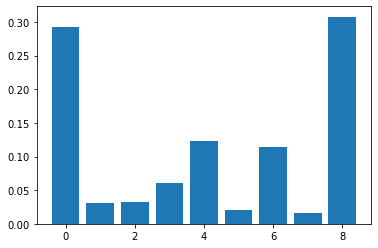

In [157]:
#Feature Importance

# get importance

importance = model_dt.feature_importances_

# summarize feature importance

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance

plt.bar([x for x in range(len(importance))], importance)
plt.show()

Maximum:  0.964824120603015
Mean:  0.8118303767157937


<AxesSubplot:>

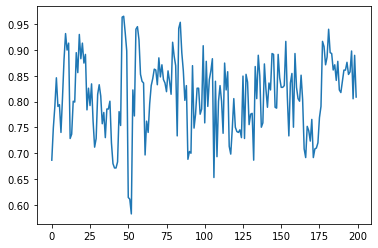

In [158]:
# K-Fold DecisionTree
dt_plot_DV = cross_val_score(tree.DecisionTreeClassifier(max_depth =8), X, y, cv=200)   # Best result with max_depth =5), X, y, cv=25
print('Maximum: ', dt_plot_DV.max())
print('Mean: ', dt_plot_DV.mean())
dt_plot_DV = pd.Series(dt_plot_DV)
dt_plot_DV.plot()

In [159]:
# KNN
model_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2).fit(X_train, y_train)
model_knn_prediction = model_knn.predict(X_test)
version_knn = accuracy_score(y_test, model_knn_prediction)
version_knn

0.8243152692855348

In [160]:
kappa_knn = cohen_kappa_score(y_test, model_knn_prediction)
kappa_knn

0.617858354800652

In [161]:
# Random Forest
model_rf = RandomForestClassifier(n_estimators=800).fit(X_train, y_train)
model_rf_prediction = model_rf.predict(X_test)
version_rf = accuracy_score(y_test, model_rf_prediction)
version_rf

0.834156964569897

In [162]:
kappa_rf = cohen_kappa_score(y_test, model_rf_prediction)
kappa_rf

0.6390359440520541

Feature: 0, Score: 0.36830
Feature: 1, Score: 0.04272
Feature: 2, Score: 0.02971
Feature: 3, Score: 0.05789
Feature: 4, Score: 0.17394
Feature: 5, Score: 0.01237
Feature: 6, Score: 0.09791
Feature: 7, Score: 0.02104
Feature: 8, Score: 0.19612


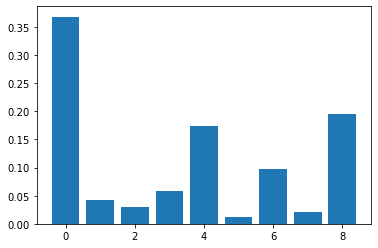

In [163]:
#Feature Importance

# get importance

importance = model_rf.feature_importances_

# summarize feature importance

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance

plt.bar([x for x in range(len(importance))], importance)
plt.show()